In [1]:
pip install yfinance


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_regression  # Veri kümesi oluşturmak için örnek
from sklearn.preprocessing import MinMaxScaler

In [5]:
pip install pandas openpyxl


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install xlrd


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
ticker = 'USD'
# Fetch the data
data = yf.download(ticker, start='2007-02-01', end='2024-01-01', interval="1d")
data.head(10)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,USD,USD,USD,USD,USD
Date,,,,,
2007-02-01,1.162581,1.162581,1.162581,1.162581,24000
2007-02-02,1.183444,1.183444,1.183444,1.183444,120000
2007-02-05,1.199708,1.207429,1.192480,1.207429,139200
2007-02-06,1.188208,1.188537,1.166360,1.181145,124800
2007-02-07,1.226320,1.226320,1.195930,1.205950,172800
2007-02-08,1.194123,1.194123,1.194123,1.194123,48000
2007-02-09,1.173588,1.235028,1.173588,1.235028,446400
2007-02-12,1.161432,1.161432,1.161432,1.161432,4800


In [8]:
data.columns

MultiIndex([( 'Close', 'USD'),
            (  'High', 'USD'),
            (   'Low', 'USD'),
            (  'Open', 'USD'),
            ('Volume', 'USD')],
           names=['Price', 'Ticker'])

In [9]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,USD,USD,USD,USD,USD
count,4258.000000,4258.000000,4258.000000,4258.000000,4.258000e+03
mean,4.796265,4.897563,4.686995,4.798284,3.513274e+06
std,6.091923,6.234904,5.936505,6.094738,7.534312e+06
min,0.195691,0.205010,0.175936,0.192522,0.000000e+00
25%,0.794347,0.806583,0.782956,0.795177,2.016000e+05
50%,1.646766,1.662453,1.625769,1.645172,4.236000e+05
75%,5.908594,5.994516,5.797567,5.890229,2.054400e+06
max,27.979548,29.069466,27.416926,28.203503,7.203840e+07


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4258 entries, 2007-02-01 to 2023-12-29
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, USD)   4258 non-null   float64
 1   (High, USD)    4258 non-null   float64
 2   (Low, USD)     4258 non-null   float64
 3   (Open, USD)    4258 non-null   float64
 4   (Volume, USD)  4258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 199.6 KB


In [11]:
# Excel dosyasının yolu
file_path = "/Users/melikeduman/Desktop/tez/veri_usd.xls"

# Excel dosyasını okuma
data_USD = pd.read_excel(file_path)

# Verilerin ilk birkaç satırını görüntüleme
print(data_USD.head())

      Close      High       Low      Open  Day  Month  Year
0  1.500833  1.474375  1.474375  1.474375    1      2  2007
1  1.521458  1.500833  1.500833  1.500833    2      2  2007
2  1.506875  1.531250  1.512292  1.531250    5      2  2007
3  1.555208  1.507292  1.479167  1.497917    6      2  2007
4  1.514375  1.555208  1.516667  1.529375    7      2  2007


In [12]:
data_USD.columns

Index(['Close', 'High', 'Low', 'Open', 'Day', 'Month', 'Year'], dtype='object')

In [13]:
data_USD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4257 entries, 0 to 4256
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4257 non-null   float64
 1   High    4257 non-null   float64
 2   Low     4257 non-null   float64
 3   Open    4257 non-null   float64
 4   Day     4257 non-null   int64  
 5   Month   4257 non-null   int64  
 6   Year    4257 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 232.9 KB


In [14]:
data_USD.describe()

,Close,High,Low,Open,Day,Month,Year
count,4257.000000,4257.000000,4257.000000,4257.000000,4257.000000,4257.000000,4257.000000
mean,4.890514,4.987283,4.773587,4.886529,15.727743,6.571529,2015.031947
std,6.082923,6.216310,5.918122,6.076046,8.749912,3.411973,4.877967
min,0.218750,0.229167,0.196667,0.215208,1.000000,1.000000,2007.000000
25%,0.863125,0.876042,0.847917,0.865833,8.000000,4.000000,2011.000000
50%,1.791250,1.815000,1.765625,1.791667,16.000000,7.000000,2015.000000
75%,6.019167,6.101250,5.911667,6.002500,23.000000,10.000000,2019.000000
max,28.110001,29.205000,27.445000,28.334999,31.000000,12.000000,2023.000000


In [15]:
data_USD

data_USD.isna()
data_USD.isna().sum()

data_USD.shape

(4257, 7)

In [16]:
print(data_USD.head())  # Veri kümesindeki tüm sütunları ve örnek değerleri görün
print(data_USD.dtypes)  # Tüm sütunların veri tiplerini kontrol edin

      Close      High       Low      Open  Day  Month  Year
0  1.500833  1.474375  1.474375  1.474375    1      2  2007
1  1.521458  1.500833  1.500833  1.500833    2      2  2007
2  1.506875  1.531250  1.512292  1.531250    5      2  2007
3  1.555208  1.507292  1.479167  1.497917    6      2  2007
4  1.514375  1.555208  1.516667  1.529375    7      2  2007
Close    float64
High     float64
Low      float64
Open     float64
Day        int64
Month      int64
Year       int64
dtype: object


data_USD['Open'] = pd.to_numeric(data_USD['Open'], errors='coerce')
data_USD['Close'] = pd.to_numeric(data_USD['Close'], errors='coerce')
data_USD['High'] = pd.to_numeric(data_USD['High'], errors='coerce')
data_USD['Low'] = pd.to_numeric(data_USD['Low'], errors='coerce')

In [17]:
print(data_USD.dtypes)  # Veri tiplerini kontrol etme
print(data_USD.head())  # İlk birkaç satırı kontrol etme

Close    float64
High     float64
Low      float64
Open     float64
Day        int64
Month      int64
Year       int64
dtype: object
      Close      High       Low      Open  Day  Month  Year
0  1.500833  1.474375  1.474375  1.474375    1      2  2007
1  1.521458  1.500833  1.500833  1.500833    2      2  2007
2  1.506875  1.531250  1.512292  1.531250    5      2  2007
3  1.555208  1.507292  1.479167  1.497917    6      2  2007
4  1.514375  1.555208  1.516667  1.529375    7      2  2007


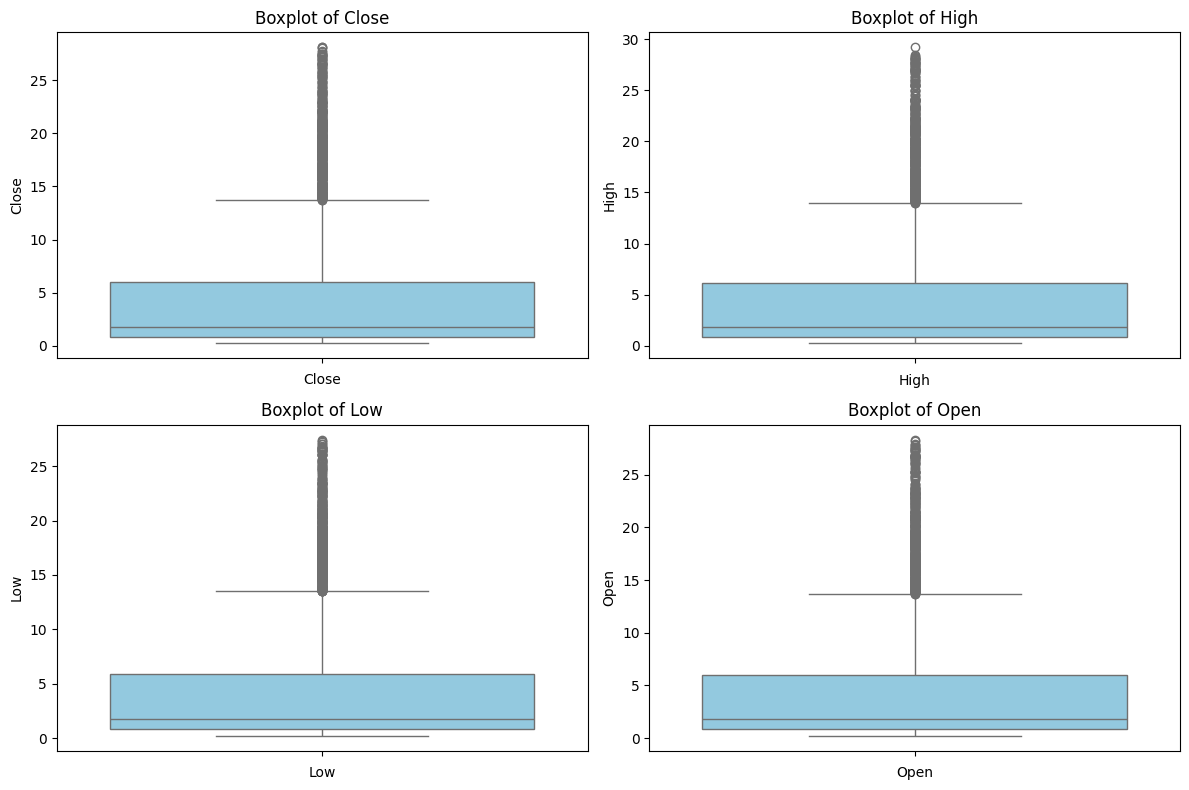

In [18]:
# Boxplot çizimi
plt.figure(figsize=(12, 8))  # Grafik boyutunu ayarlama
columns_to_plot = ['Close', 'High', 'Low', 'Open']  # Boxplot çizilecek sütunlar

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)  # Alt grafik düzeni (2 satır, 2 sütun)
    sns.boxplot(y=data_USD[column], color="skyblue")
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.tight_layout()

plt.show()

In [19]:
Q1 = data_USD["Close"].quantile(0.25)
Q3 = data_USD["Close"].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerler: Q1 - 1.5 * IQR veya Q3 + 1.5 * IQR dışındaki değerler
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerler
outliers = data_USD["Close"][(data_USD["Close"] < lower_bound) | (data_USD["Close"] > upper_bound)]

# Aykırı değer sayısı
outlier_count = outliers.shape[0]
print(f"Aykırı değer sayısı: {outlier_count}")

Aykırı değer sayısı: 485


Logaritmik dönüşüm uyguluyor. Bu, Close sütunundaki her bir değerin doğal logaritmasını alır ve yeni bir sütun olan Log_Close içine kaydeder.

Neden Logaritmik Dönüşüm Kullanılır?
Büyük Değerlerin Etkisini Azaltır: Finansal verilerde fiyatlar genellikle geniş bir aralıkta değişebilir (örneğin, 1'den 1000'e). Log dönüşümü, büyük değerlerin etkisini küçülterek dağılımı daha simetrik hale getirir.
Çarpıksılığı (Skewness) Azaltır: Eğer veri sağa çarpık (büyük değerler daha yoğun) ise, log dönüşümü veriyi daha dengeli bir şekilde yayar.
Oransal Değişimlere Odaklanır: Finansal zaman serilerinde genellikle fiyat seviyesinden çok, fiyatın yüzdesel değişimi önemlidir. Logaritmik dönüşüm, mutlak değerler yerine oransal değişimleri vurgular.
Örneğin:

Eğer Close değeri 1.50 ise:
log
⁡
(
1.50
)
=
0.405
log(1.50)=0.405
Eğer Close değeri 10.0 ise:
log
⁡
(
10.0
)
=
2.303
log(10.0)=2.303
Bu, daha büyük değerlerin ölçeğini küçültür.

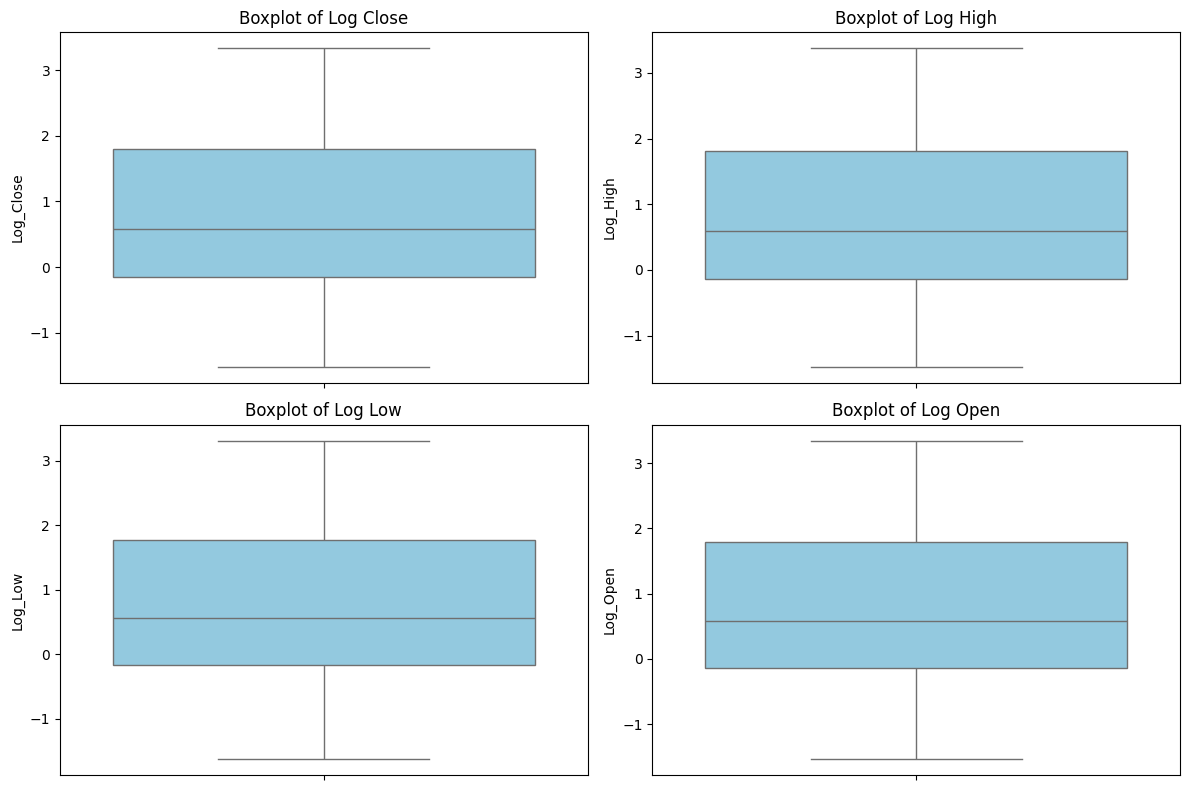

In [20]:
# Log dönüşümü için uygun olan sütunları belirleyin
columns_to_transform = ['Close', 'High', 'Low', 'Open']

# Her sütun için logaritmik dönüşüm uygula
for col in columns_to_transform:
    data_USD[f'Log_{col}'] = np.log(data_USD[col])

# Log dönüşümü yapılan sütunların boxplotlarını çiz
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_transform, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data_USD[f'Log_{col}'], color="skyblue")
    plt.title(f'Boxplot of Log {col}')
plt.tight_layout()
plt.show()

In [21]:
data_USD.dtypes

numeric_data = data_USD.select_dtypes(include=['float64', 'int32', 'int64'])

for column in numeric_data.columns:
    correlation = numeric_data[column].corr(numeric_data[column])
    print(f"{column} sütununun kendisiyle olan korelasyonu: {correlation}")
# kendisiyle korelasyonu 1 değil ise veri eksiktir.

print(numeric_data.isnull().sum())  # Her sütundaki eksik değerleri gösterir

# Eksik değerleri doldur (örneğin, 0 ile):
numeric_data = numeric_data.fillna(0)

Close sütununun kendisiyle olan korelasyonu: 1.0
High sütununun kendisiyle olan korelasyonu: 1.0
Low sütununun kendisiyle olan korelasyonu: 1.0
Open sütununun kendisiyle olan korelasyonu: 1.0
Day sütununun kendisiyle olan korelasyonu: 1.0
Month sütununun kendisiyle olan korelasyonu: 0.9999999999999999
Year sütununun kendisiyle olan korelasyonu: 1.0
Log_Close sütununun kendisiyle olan korelasyonu: 1.0
Log_High sütununun kendisiyle olan korelasyonu: 0.9999999999999998
Log_Low sütununun kendisiyle olan korelasyonu: 1.0
Log_Open sütununun kendisiyle olan korelasyonu: 0.9999999999999998
Close        0
High         0
Low          0
Open         0
Day          0
Month        0
Year         0
Log_Close    0
Log_High     0
Log_Low      0
Log_Open     0
dtype: int64


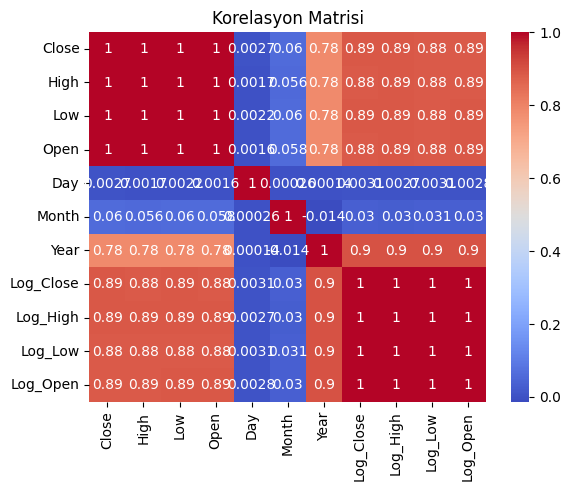

In [22]:
# Korelasyon matrisi oluştur
correlation_matrix = numeric_data.corr()
# Isı haritasını çiz
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()

Log Dönüşümü

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


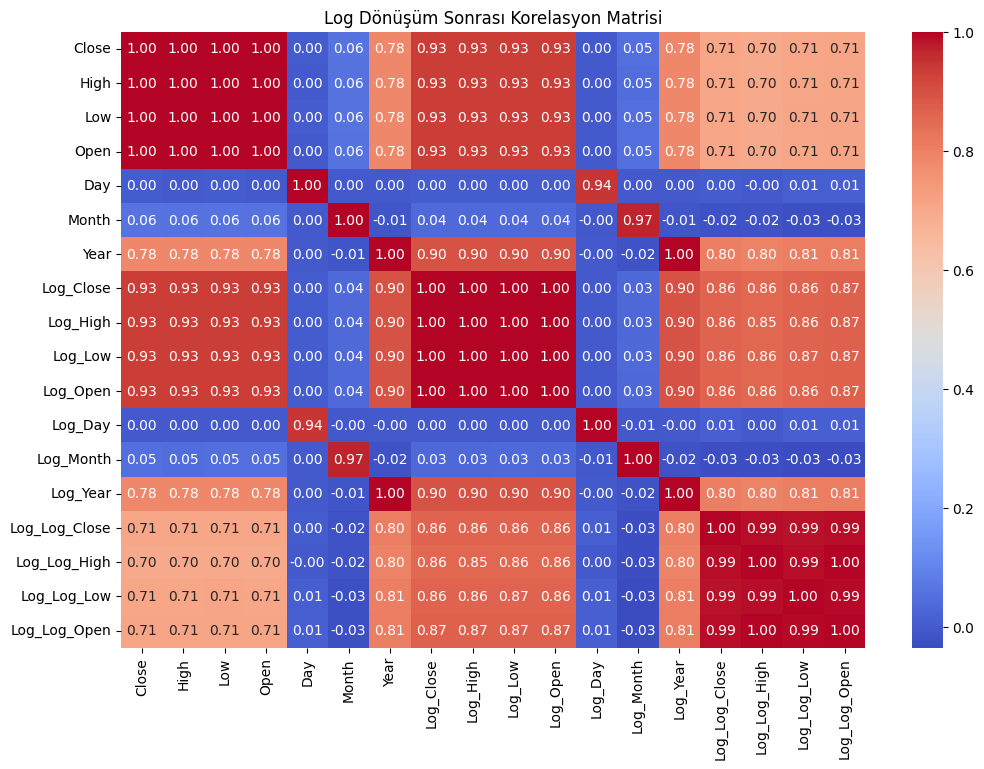

In [23]:
# Sadece sayısal sütunları seç
numeric_data = data_USD.select_dtypes(include=['float64', 'int32', 'int64'])

# Eksik değerleri doldurma (örneğin, ortalama ile doldurabilirsiniz)
numeric_data = numeric_data.fillna(numeric_data.mean())

# Log dönüşümü uygula ve yeni sütunlar ekle
log_transformed_data = numeric_data.copy()
for column in numeric_data.columns:
    log_transformed_data[f'Log_{column}'] = np.log1p(numeric_data[column])  # log1p(1 + x) negatif değerler için güvenli

# Log dönüşüm sonrası korelasyon matrisi
correlation_matrix = log_transformed_data.corr()

# Korelasyon matrisini çizdir
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Log Dönüşüm Sonrası Korelasyon Matrisi")
plt.show()

In [24]:
pip install scipy numpy


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [25]:
from scipy.stats import entropy

In [26]:
X = data_USD[["Open", "High", "Low", "Day", "Month", "Year"]]  # Bağımsız değişkenler
y= data_USD["Close"]

y = np.ravel(y)

In [27]:
# Veriyi Eğitim ve Test Setlerine Böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
print('Random Forset Sonucu:')
#RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_reg.fit(X_train, y_train)
# Eğitim verisi üzerinde tahmin
train_predictions = rf_reg.predict(X_train)
# Test verisi üzerinde tahmin
test_predictions = rf_reg.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f"Eğitim Verisi MSE: {train_mse}")
print(f"Test Verisi MSE: {test_mse}")

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f"Eğitim Verisi R² Skoru: {train_r2}")
print(f"Test Verisi R² Skoru: {test_r2}")

Random Forset Sonucu:
Eğitim Verisi MSE: 0.025185771351562934
Test Verisi MSE: 0.1288792884545613
Eğitim Verisi R² Skoru: 0.9993330858553661
Test Verisi R² Skoru: 0.9961846465801573


In [29]:
#test_size=0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_reg.fit(X_train, y_train)
# Eğitim verisi üzerinde tahmin
train_predictions = rf_reg.predict(X_train)
# Test verisi üzerinde tahmin
test_predictions = rf_reg.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f"Eğitim Verisi MSE: {train_mse}")
print(f"Test Verisi MSE: {test_mse}")

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f"Eğitim Verisi R² Skoru: {train_r2}")
print(f"Test Verisi R² Skoru: {test_r2}")

Eğitim Verisi MSE: 0.02365919425764958
Test Verisi MSE: 0.1236376395624119
Eğitim Verisi R² Skoru: 0.9993666025249127
Test Verisi R² Skoru: 0.9965874318922697


In [30]:
#test_size=0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_reg.fit(X_train, y_train)
# Eğitim verisi üzerinde tahmin
train_predictions = rf_reg.predict(X_train)
# Test verisi üzerinde tahmin
test_predictions = rf_reg.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f"Eğitim Verisi MSE: {train_mse}")
print(f"Test Verisi MSE: {test_mse}")

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f"Eğitim Verisi R² Skoru: {train_r2}")
print(f"Test Verisi R² Skoru: {test_r2}")

Eğitim Verisi MSE: 0.0254086568648848
Test Verisi MSE: 0.12483172205699895
Eğitim Verisi R² Skoru: 0.9993217280221451
Test Verisi R² Skoru: 0.9964889773162449


In [31]:
print('ExtraTree Sonucu:')
# ExtraTreesRegressor
ext_reg = ExtraTreesRegressor(n_estimators=100,random_state=42)
ext_reg.fit(X_train, y_train)
train_predictions = ext_reg.predict(X_train)
test_predictions = ext_reg.predict(X_test)


train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f"Eğitim Verisi MSE: {train_mse}")
print(f"Test Verisi MSE: {test_mse}")


train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f"Eğitim Verisi R² Skoru: {train_r2}")
print(f"Test Verisi R² Skoru: {test_r2}")

ExtraTree Sonucu:
Eğitim Verisi MSE: 0.0
Test Verisi MSE: 0.1222812967315014
Eğitim Verisi R² Skoru: 1.0
Test Verisi R² Skoru: 0.9965607106947763


In [32]:
# DECISION TREE
# Modeli Eğitme
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Tahmin
predictions = model.predict(X_test)
print(predictions)

# Mean Squared Error (MSE) ve R2 Score hesaplama
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

print(f"y_test shape: {y_test.shape}")
print(f"predictions shape: {predictions.shape}")

y_test = y_test.squeeze()

errors = y_test - predictions
print(errors)

[ 1.65083301  0.98020798  5.55499983 ...  0.97916698 17.07500076
  0.29708299]
Mean Squared Error: 0.199074182332925
R2 Score: 0.9944008305068341
y_test shape: (1065,)
predictions shape: (1065,)
[-6.25014305e-04  2.74999738e-02 -5.74998856e-02 ...  1.05833054e-01
  8.84998322e-01 -2.75000036e-02]


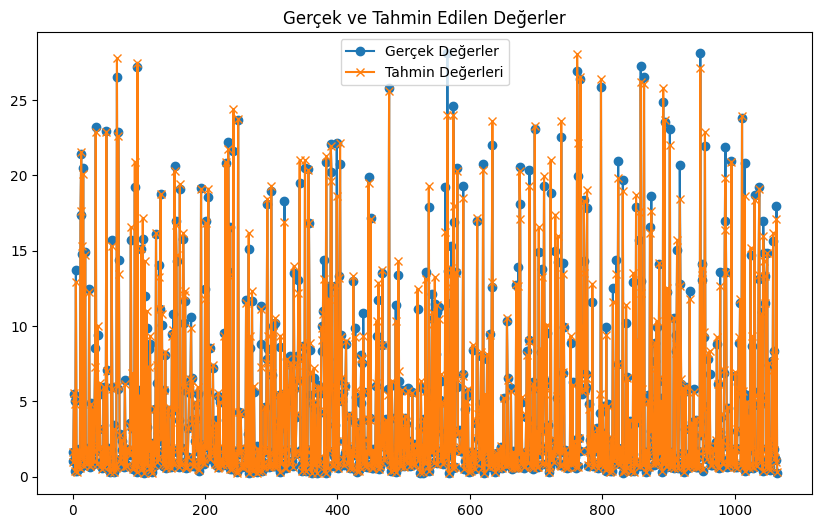

In [33]:
import matplotlib.pyplot as plt #Tahmin edilen değerleri ve gerçek değerleri bir grafik üzerinde

plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Gerçek Değerler", marker="o")
plt.plot(predictions, label="Tahmin Değerleri", marker="x")
plt.legend()
plt.title("Gerçek ve Tahmin Edilen Değerler")
plt.show()

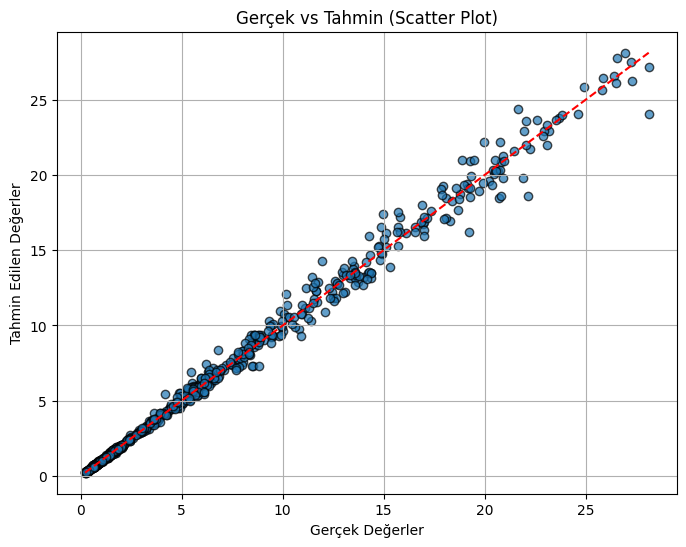

In [34]:
import matplotlib.pyplot as plt #gerçek ve tahmin edilen değerlerin doğruluğunu bir dağılım grafiği

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.7, edgecolor="k")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # 1:1 doğrusal çizgi
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek vs Tahmin (Scatter Plot)")
plt.grid(True)
plt.show()

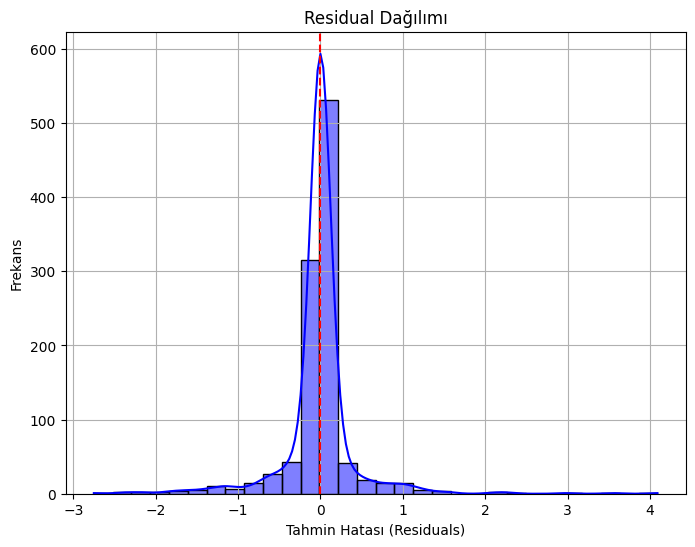

Close        0
High         0
Low          0
Open         0
Day          0
Month        0
Year         0
Log_Close    0
Log_High     0
Log_Low      0
Log_Open     0
dtype: int64

In [35]:
import seaborn as sns #Tahmin hatalarını analiz etmek için artık değerleri (residuals)

residuals = y_test - predictions  # Gerçek ve tahmin farkı
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color="blue", edgecolor="k")
plt.axvline(x=0, color="red", linestyle="--")
plt.xlabel("Tahmin Hatası (Residuals)")
plt.ylabel("Frekans")
plt.title("Residual Dağılımı")
plt.grid(True)
plt.show()

data_USD.isna().sum()

In [36]:
pip install pycaret


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


ANN-yapay sinir ağları

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Excel dosyasını okuma
file_path = "/Users/melikeduman/Desktop/tez/veri_usd.xls"
data_USD = pd.read_excel(file_path)

# Verilerin ilk birkaç satırını görüntüleme
print(data_USD.head())

# Özellikler (features) ve hedef (target) değişkeni belirleme
# Bu örnekte "Close" fiyatını tahmin etmeye çalışacağız, diğer sütunlar özellikler olacak
X = data_USD[['High', 'Low', 'Open', 'Day', 'Month', 'Year']]
y = data_USD['Close']

# Veriyi eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendirme (özellikleri aynı ölçeğe getirme)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Yapay sinir ağı modelini oluşturma
model = MLPRegressor(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

# Modeli eğitme
model.fit(X_train_scaled, y_train)

# Test verisi ile tahmin yapma
y_pred = model.predict(X_test_scaled)

# Modeli değerlendirme
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

# Örnek tahminleri yazdırma
print("Gerçek Değerler: ", y_test.values[:5])
print("Tahmin Edilen Değerler: ", y_pred[:5])


      Close      High       Low      Open  Day  Month  Year
0  1.500833  1.474375  1.474375  1.474375    1      2  2007
1  1.521458  1.500833  1.500833  1.500833    2      2  2007
2  1.506875  1.531250  1.512292  1.531250    5      2  2007
3  1.555208  1.507292  1.479167  1.497917    6      2  2007
4  1.514375  1.555208  1.516667  1.529375    7      2  2007
Mean Squared Error (MSE): 0.15351086029483926
R^2 Score: 0.9954554514318613
Gerçek Değerler:  [1.650208   1.00770795 5.49749994 5.03833294 0.39479199]
Tahmin Edilen Değerler:  [1.64720156 0.78964728 5.35600852 4.51356452 0.4740783 ]


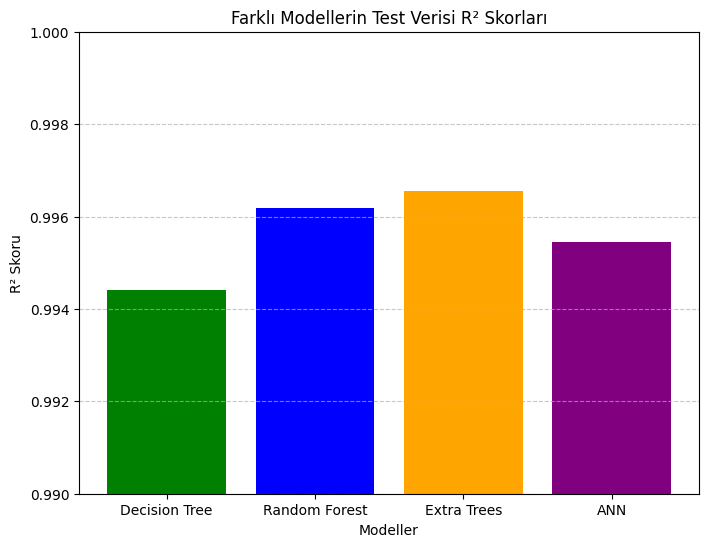

In [38]:
# 3 farklı modelin R² skorlarını görselleştirme
tree_models = ['Decision Tree', 'Random Forest', 'Extra Trees','ANN']
r2_scores = [0.9944008305068341,  0.9961846465801573,  0.9965607106947763, 0.9954554514318613]

plt.figure(figsize=(8, 6))
plt.bar(tree_models, r2_scores, color=['green', 'blue', 'orange', 'purple'])
plt.title('Farklı Modellerin Test Verisi R² Skorları')
plt.ylabel('R² Skoru')
plt.xlabel('Modeller')
plt.ylim(0.99, 1.0)  # Daha anlamlı bir görselleştirme için sınırları daraltabilirsiniz
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Auto-Keras

In [39]:
pip install tensorflow


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install autokeras


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [41]:
import autokeras as ak

# AutoKeras modülündeki mevcut tüm sınıf ve fonksiyonları listeleyelim
print(dir(ak))

2025-01-12 14:29:48.388633: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


['AutoModel', 'BayesianOptimization', 'BertBlock', 'Block', 'CUSTOM_OBJECTS', 'CastToFloat32', 'ClassificationHead', 'ConvBlock', 'DenseBlock', 'EfficientNetBlock', 'ExpandLastDim', 'Flatten', 'Greedy', 'Head', 'Hyperband', 'ImageAugmentation', 'ImageBlock', 'ImageClassifier', 'ImageInput', 'ImageRegressor', 'Input', 'Merge', 'Node', 'Normalization', 'RNNBlock', 'RandomSearch', 'RegressionHead', 'ResNetBlock', 'SpatialReduction', 'TemporalReduction', 'TextBlock', 'TextClassifier', 'TextInput', 'TextRegressor', 'XceptionBlock', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'adapters', 'analysers', 'auto_model', 'blocks', 'engine', 'graph', 'hyper_preprocessors', 'image_dataset_from_directory', 'keras_layers', 'keras_nlp', 'nodes', 'pipeline', 'preprocessors', 'tasks', 'text_dataset_from_directory', 'tuners', 'utils']


In [42]:
# Özellikler (features) ve hedef (target) değişkeni belirleme
X = data_USD[['High', 'Low', 'Open', 'Day', 'Month', 'Year']]
y = data_USD['Close']

# Veriyi eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendirme (özellikleri aynı ölçeğe getirme)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# NumPy dizisine dönüştürme (AutoKeras için gerekli)
y_train = np.array(y_train)
y_test = np.array(y_test)

# AutoKeras ile regresyon modeli oluşturma
regressor = ak.AutoModel(
    inputs=ak.Input(),
    outputs=ak.RegressionHead()
)

# Modeli eğitme
regressor.fit(X_train_scaled, y_train, epochs=10)

# Test verisi ile tahmin yapma
y_pred = regressor.predict(X_test_scaled)

# Modeli değerlendirme
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")


Trial 96 Complete [00h 00m 06s]
val_loss: 0.5024387240409851

Best val_loss So Far: 0.1230650395154953
Total elapsed time: 00h 49m 25s
Epoch 1/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 8.2752 - mean_squared_error: 8.2752   
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2629 - mean_squared_error: 0.2629 
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2530 - mean_squared_error: 0.2530 
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2105 - mean_squared_error: 0.2105 
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1835 - mean_squared_error: 0.1835 
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1597 - mean_squared_error: 0.1597 
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1471 - mean_squared_error: 0.1471   
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1437 - mean_squared_error: 0.1437 
Epoch 9/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1440 - mean_squared_err

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adamw', because it has 1 variables whereas the saved optimizer has 13 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 6))
  warnings.warn(msg)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Squared Error (MSE): 0.12083188893672273
R^2 Score: 0.9964228824801177


paycerıt

In [53]:
from pycaret.regression import *

In [54]:
print(data_USD.columns)

Index(['Close', 'High', 'Low', 'Open', 'Day', 'Month', 'Year'], dtype='object')


In [55]:
import pycaret
print(pycaret.__version__)

3.3.2


In [56]:
print(data["Close"].isna().sum())

Ticker
USD    0
dtype: int64


In [57]:
print(data_USD["Close"].dtype)

float64


In [58]:
from pycaret.regression import *

# PyCaret setup işlemi
regression_setup = setup(
    data=data_USD, 
    target="Close",  # Hedef değişken
    train_size=0.8,  # Eğitim ve test seti oranı
    session_id=42    # Reprodüksiyon için rastgele durum
)

# Tüm modelleri karşılaştır
best_model = compare_models()

# En iyi modeli seçip eğitim işlemi
final_model = finalize_model(best_model)

# Test setinde tahmin yapma
predictions = predict_model(final_model)


,Description,Value
0,Session id,42
1,Target,Close
2,Target type,Regression
3,Original data shape,"(4257, 7)"
4,Transformed data shape,"(4257, 7)"
5,Transformed train set shape,"(3405, 7)"
6,Transformed test set shape,"(852, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.1520,0.1113,0.3326,0.9970,0.0272,0.0290,0.6720
ridge,Ridge Regression,0.1520,0.1113,0.3326,0.9970,0.0272,0.0290,0.0210
lar,Least Angle Regression,0.1520,0.1113,0.3326,0.9970,0.0272,0.0290,0.0170
br,Bayesian Ridge,0.1520,0.1113,0.3326,0.9970,0.0272,0.0290,0.0170
huber,Huber Regressor,0.1550,0.1149,0.3380,0.9969,0.0274,0.0285,0.0460
gbr,Gradient Boosting Regressor,0.1703,0.1298,0.3595,0.9965,0.0301,0.0337,0.2950
rf,Random Forest Regressor,0.1706,0.1376,0.3699,0.9963,0.0298,0.0311,0.8170
omp,Orthogonal Matching Pursuit,0.1693,0.1366,0.3691,0.9963,0.0299,0.0334,0.0170
et,Extra Trees Regressor,0.1691,0.1382,0.3708,0.9963,0.0298,0.0310,0.4520
par,Passive Aggressive Regressor,0.2008,0.1404,0.3739,0.9962,0.0437,0.0679,0.0250


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.1450,0.1189,0.3448,0.9965,0.0282,0.0293
